In [1]:
import meld_graph
import meld_graph.models
import meld_graph.experiment
import meld_graph.dataset
import meld_graph.data_preprocessing
import meld_graph.evaluation
import torch_geometric.data
import matplotlib.pyplot as plt

from meld_classifier.paths import NVERT
from meld_graph.dataset import GraphDataset
from meld_classifier.meld_cohort import MeldCohort

from meld_graph.evaluation import Evaluator, sigmoid
import numpy as np
import matplotlib_surface_plotting as msp
import torch

import captum
from captum.attr import IntegratedGradients
from torch import nn

from meld_graph.models import PredictionForSaliency
import matplotlib_surface_plotting as msp

Setting MELD_DATA_PATH to /home/co-spit1/meld_data
Setting BASE_PATH to /home/co-spit1/meld_data
Setting EXPERIMENT_PATH to /home/co-spit1/meld_experiments/co-spit1
Setting FS_SUBJECTS_PATH to /home/co-spit1/meld_data/output/fs_outputs
Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1


In [2]:
model_name = '/home/co-spit1/software/meld_classifier_GDL/meld_experiments_graph/kw350/23-10-30_FOPF_dcop/s_0/fold_all'
split = 'test'


## two threshold

In [3]:
# from evaluate_single_model.sh
cohort = MeldCohort(hdf5_file_root='{site_code}_{group}_featurematrix_combat_6.hdf5',
               dataset='MELD_dataset_V6.csv')
exp = meld_graph.experiment.Experiment.from_folder(model_name)

subjects = exp.data_parameters[f'{split}_ids'][:20]

features= exp.data_parameters['features']
exp.data_parameters['augment_data']={}

dataset = GraphDataset(subjects, cohort, exp.data_parameters, mode='test')

eva = Evaluator(experiment = exp,
                checkpoint_path = model_name,
                save_dir = model_name,
                make_images = False,
                dataset=dataset,
                cohort=cohort,
                subject_ids = subjects,
                mode = 'test',
                saliency=True,
               threshold='two_threshold')

Initialised Experiment 23-10-30_FOPF_dcop/s_0


/home/co-spit1/software/meld_classifier_GDL/meld_experiments_graph/kw350/23-10-30_FOPF_dcop/s_0/fold_all


Loading and preprocessing test data
Z-scoring data for MELD_H2_15T_FCD_0001
Z-scoring data for MELD_H2_15T_FCD_0003
Z-scoring data for MELD_H2_15T_FCD_0005
Z-scoring data for MELD_H2_15T_FCD_0007
Z-scoring data for MELD_H2_15T_FCD_0008
Z-scoring data for MELD_H2_15T_FCD_0009
Z-scoring data for MELD_H2_15T_FCD_0014
Z-scoring data for MELD_H2_15T_FCD_0015
Z-scoring data for MELD_H2_15T_FCD_0016
Z-scoring data for MELD_H2_15T_FCD_0020
Z-scoring data for MELD_H2_15T_FCD_0023
Z-scoring data for MELD_H2_15T_FCD_0028
Z-scoring data for MELD_H2_15T_FCD_0029
Z-scoring data for MELD_H2_15T_FCD_0030
Z-scoring data for MELD_H2_3T_FCD_0003
Z-scoring data for MELD_H2_3T_FCD_0004
Z-scoring data for MELD_H2_3T_FCD_0005
Z-scoring data for MELD_H2_3T_FCD_0006
Z-scoring data for MELD_H2_3T_FCD_0008
Z-scoring data for MELD_H2_3T_FCD_0014
Evaluation test, min area threshold=100, threshold two_threshold(ymin=0.1825576901435852, ymax=0.5)
Creating model
Loading model weights from checkpoint /home/co-spit1/so

In [4]:
eva.load_predict_data(save_prediction=False)
eva.threshold_and_cluster(save_prediction=False)

loading data and predicting model
/home/co-spit1/software/meld_classifier_GDL/meld_graph/evaluation.py:329: RuntimeWarning: invalid value encountered in true_divide
  x = 1 - self.roc_dictionary["specificity"] / self.roc_dictionary["specificity"][-1]


using thresholds [0.18255769 0.5       ]
{'left': array([0.54837978, 0.53720647, 0.54424483, ..., 0.54707414, 0.5437271 ,
       0.54253769]), 'right': array([0.54230219, 0.54295063, 0.55827564, ..., 0.54507709, 0.54391706,
       0.54850149])} 0.1825576901435852
{'left': array([0.54837978, 0.53720647, 0.54424483, ..., 0.54707414, 0.5437271 ,
       0.54253769]), 'right': array([0.54230219, 0.54295063, 0.55827564, ..., 0.54507709, 0.54391706,
       0.54850149])} 0.5
threshold_subj = 0.5
using thresholds [0.18255769 0.5       ]
{'left': array([0.55827022, 0.54308224, 0.55483508, ..., 0.56291634, 0.56557983,
       0.5572598 ]), 'right': array([0.54341602, 0.54187709, 0.56194067, ..., 0.55799973, 0.557859  ,
       0.55558336])} 0.1825576901435852
{'left': array([0.55827022, 0.54308224, 0.55483508, ..., 0.56291634, 0.56557983,
       0.5572598 ]), 'right': array([0.54341602, 0.54187709, 0.56194067, ..., 0.55799973, 0.557859  ,
       0.55558336])} 0.5
threshold_subj = 0.5
using threshol

{'left': array([0.542548  , 0.53870666, 0.55072123, ..., 0.54474515, 0.54847097,
       0.54551262]), 'right': array([0.55026311, 0.54230905, 0.55981529, ..., 0.54566979, 0.54771495,
       0.54350591])} 0.5
threshold_subj = 0.5
using thresholds [0.18255769 0.5       ]
{'left': array([0.5483675 , 0.55070901, 0.54563546, ..., 0.5534302 , 0.55401528,
       0.55654466]), 'right': array([0.53798133, 0.54566979, 0.55430055, ..., 0.54128379, 0.54430515,
       0.54351598])} 0.1825576901435852
{'left': array([0.5483675 , 0.55070901, 0.54563546, ..., 0.5534302 , 0.55401528,
       0.55654466]), 'right': array([0.53798133, 0.54566979, 0.55430055, ..., 0.54128379, 0.54430515,
       0.54351598])} 0.5
threshold_subj = 0.5
using thresholds [0.18255769 0.5       ]
{'left': array([0.53764158, 0.53986603, 0.5693534 , ..., 0.54777873, 0.55158544,
       0.55263764]), 'right': array([0.54118961, 0.54375172, 0.54782689, ..., 0.54058933, 0.54381478,
       0.54286158])} 0.1825576901435852
{'left': array

In [5]:
eva.data_dictionary


{'MELD_H2_15T_FCD_0001': {'input_labels': array([0, 0, 0, ..., 0, 0, 0]),
  'result': array([0.5483798 , 0.5372065 , 0.5442448 , ..., 0.5450771 , 0.54391706,
         0.5485015 ], dtype=float32),
  'distance_map': array([0.06651708, 0.08828221, 0.19784416, ..., 0.0578412 , 0.08981581,
         0.10762717], dtype=float32),
  'borderzone': array([False, False, False, ..., False, False, False]),
  'input_features': array([[-1.2169651 ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [-0.96694344,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.2776902 ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [-0.19492689,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [-0.19304131,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [-0.14171083,  0.        ,  0.        , ...

In [6]:
eva.data_dictionary['MELD_H2_15T_FCD_0001']['result'].max()

0.65776616

In [7]:
# TODO look at whether this makes sense
(eva.data_dictionary['MELD_H2_15T_FCD_0001']['result'] > 0.18)

array([ True,  True,  True, ...,  True,  True,  True])

In [8]:
(eva.data_dictionary['MELD_H2_15T_FCD_0001']['cluster_thresholded_low_conf'] == eva.data_dictionary['MELD_H2_15T_FCD_0001']['cluster_thresholded_high_conf']).all()

False

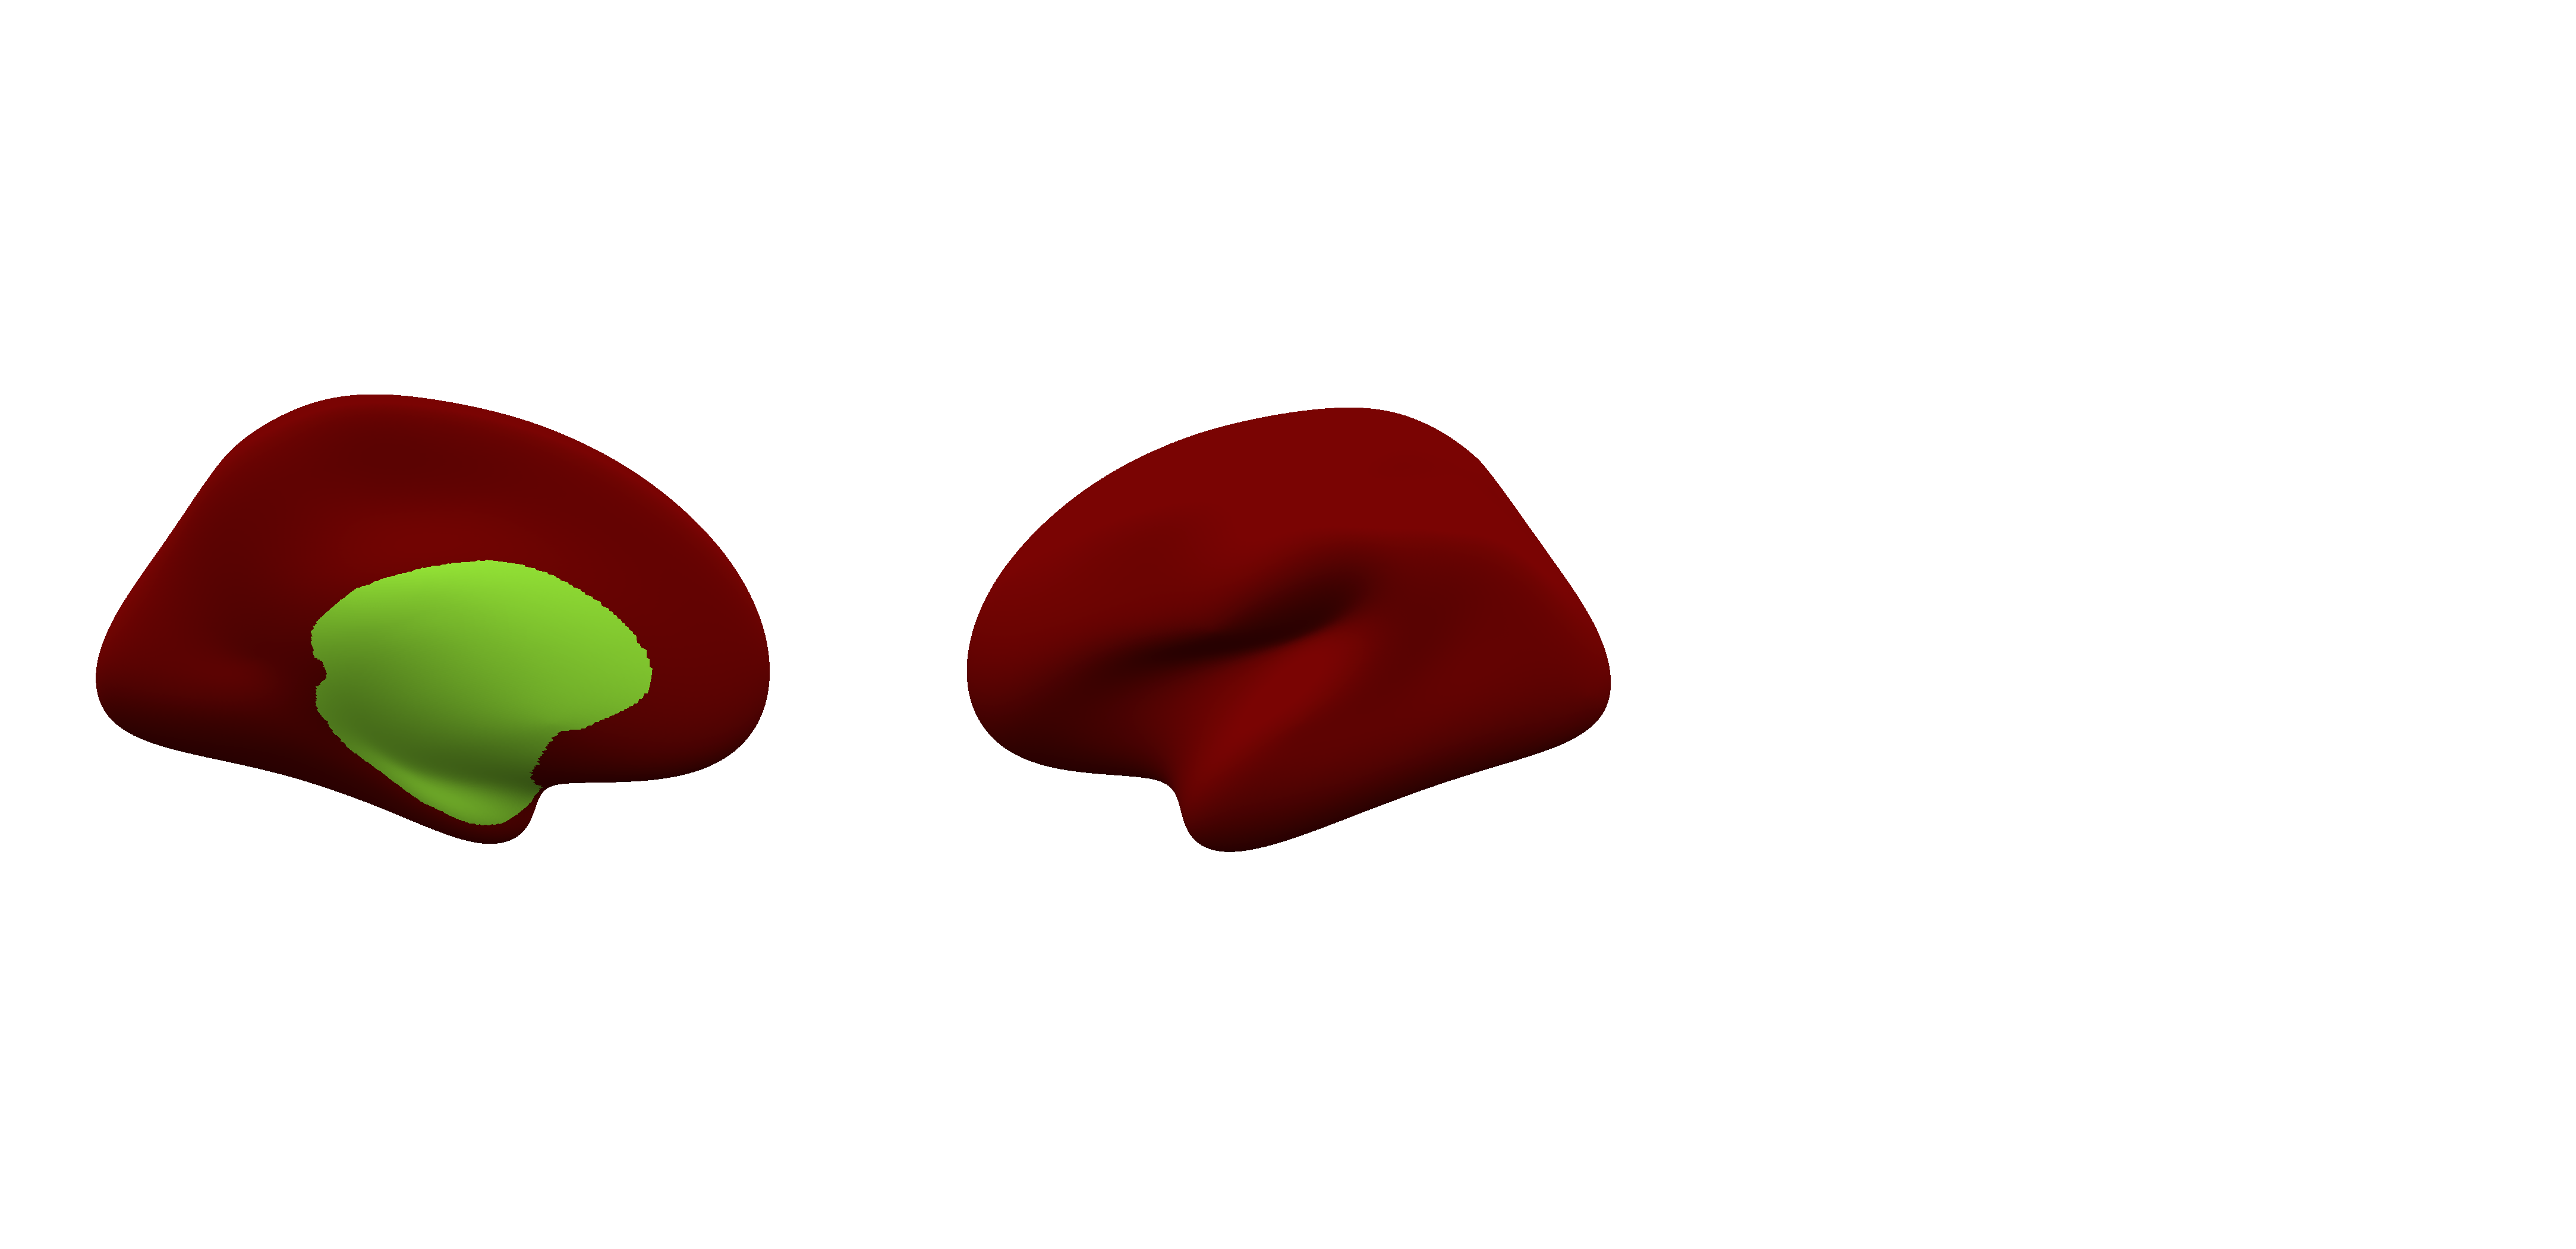

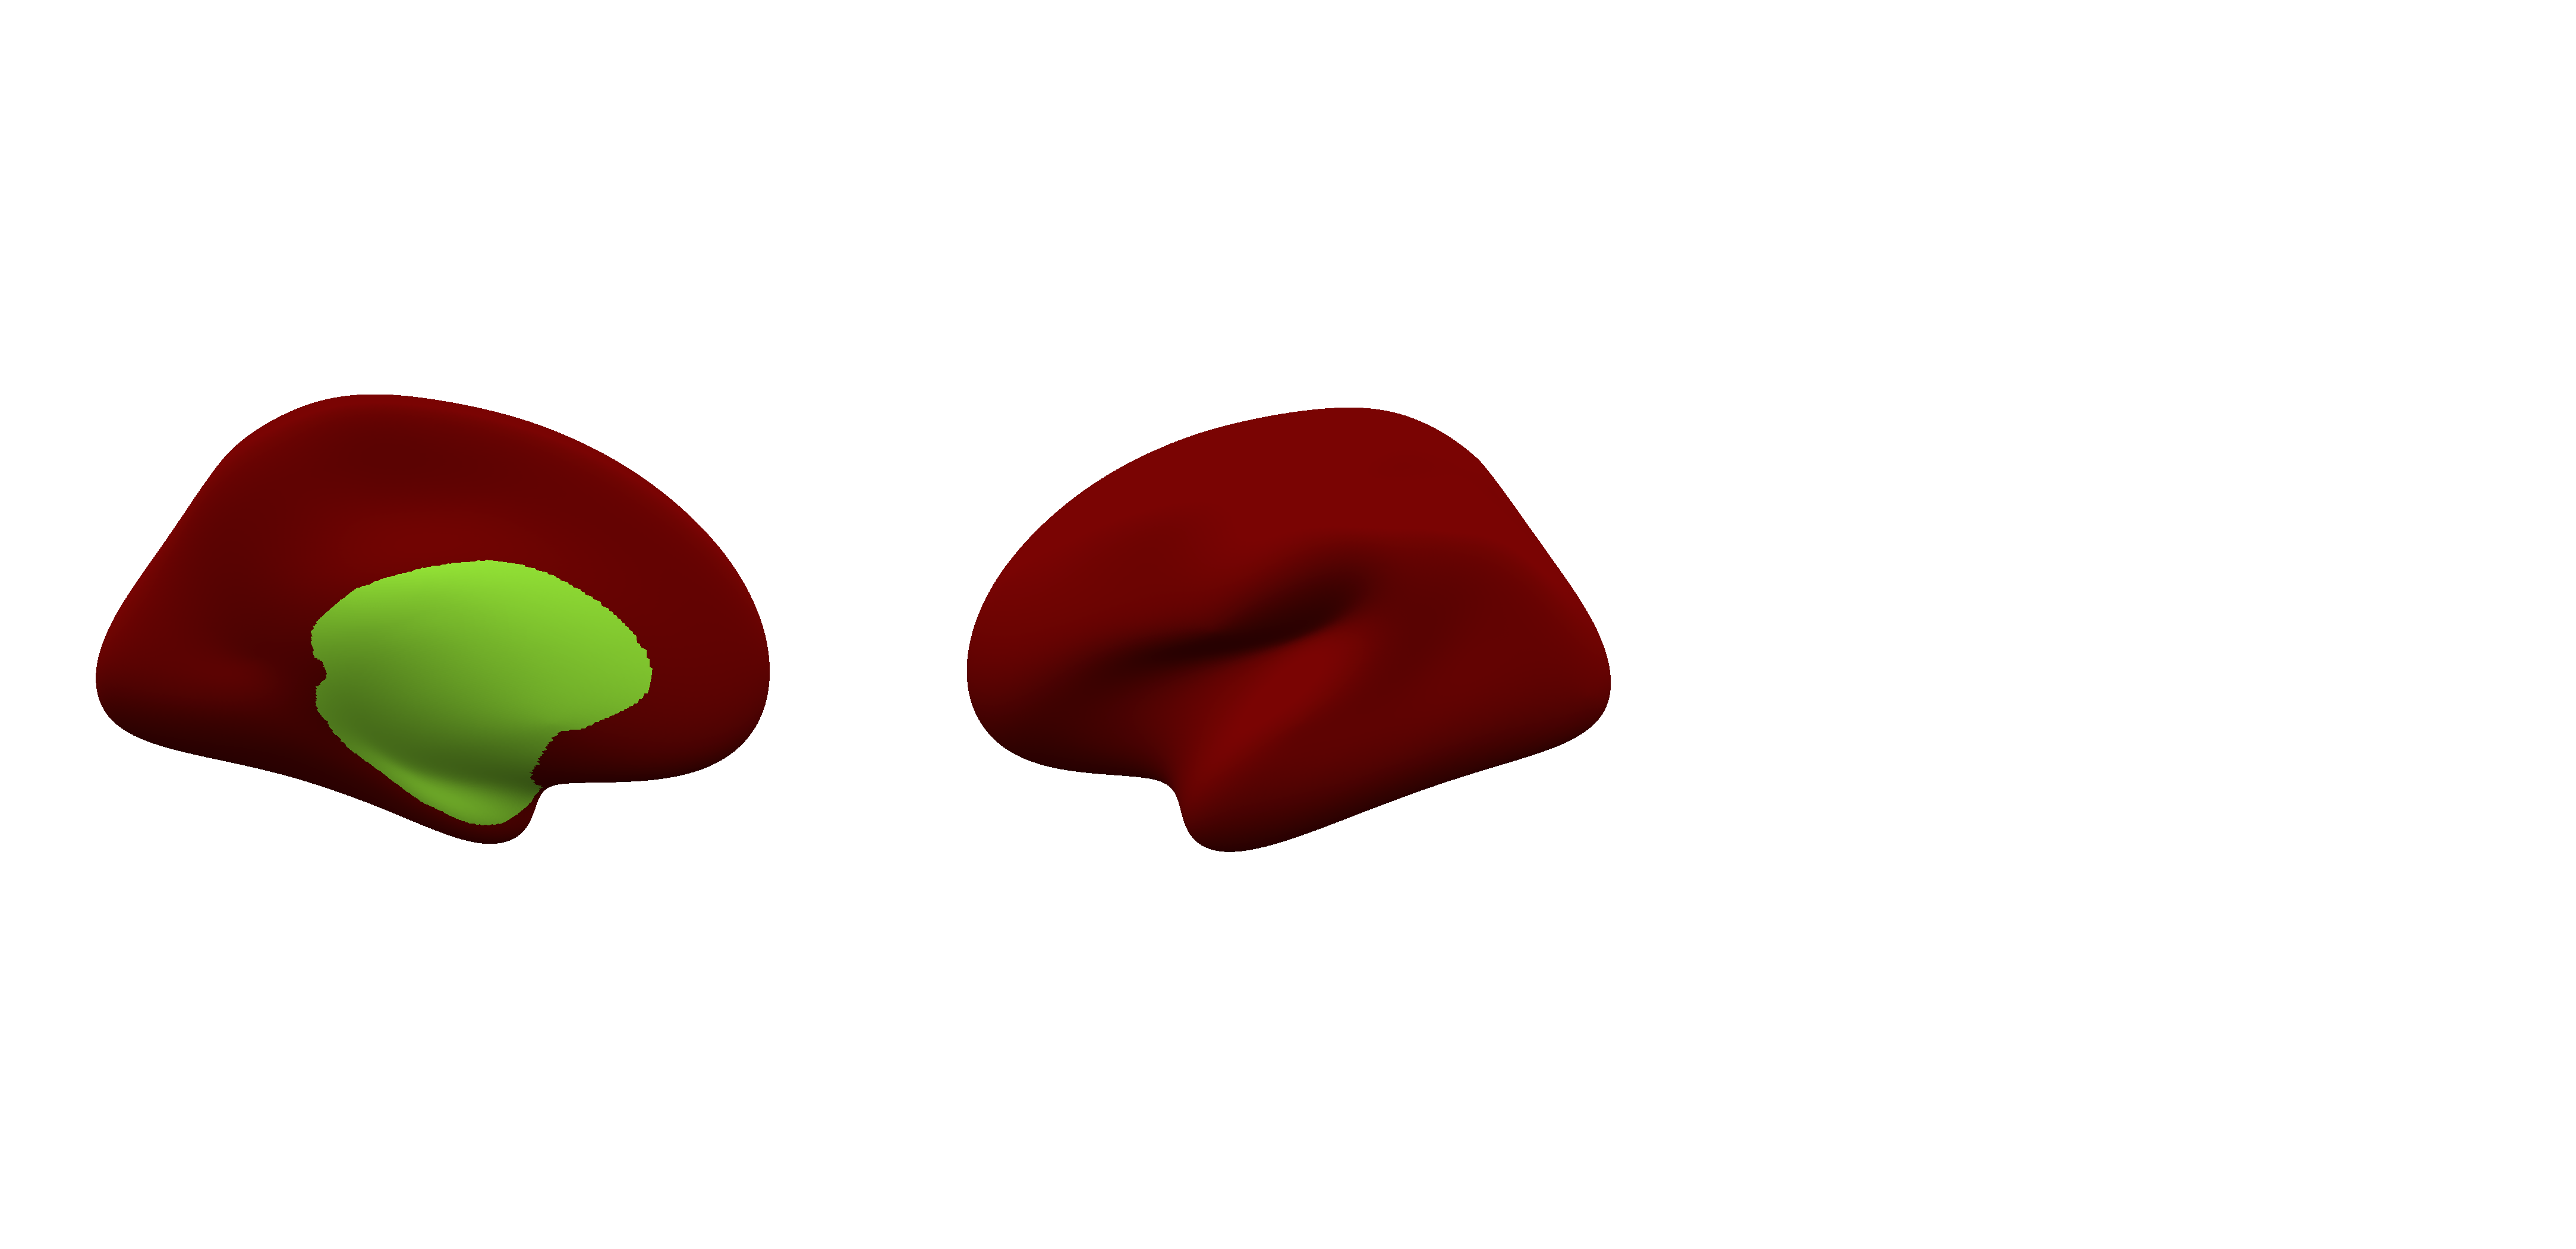

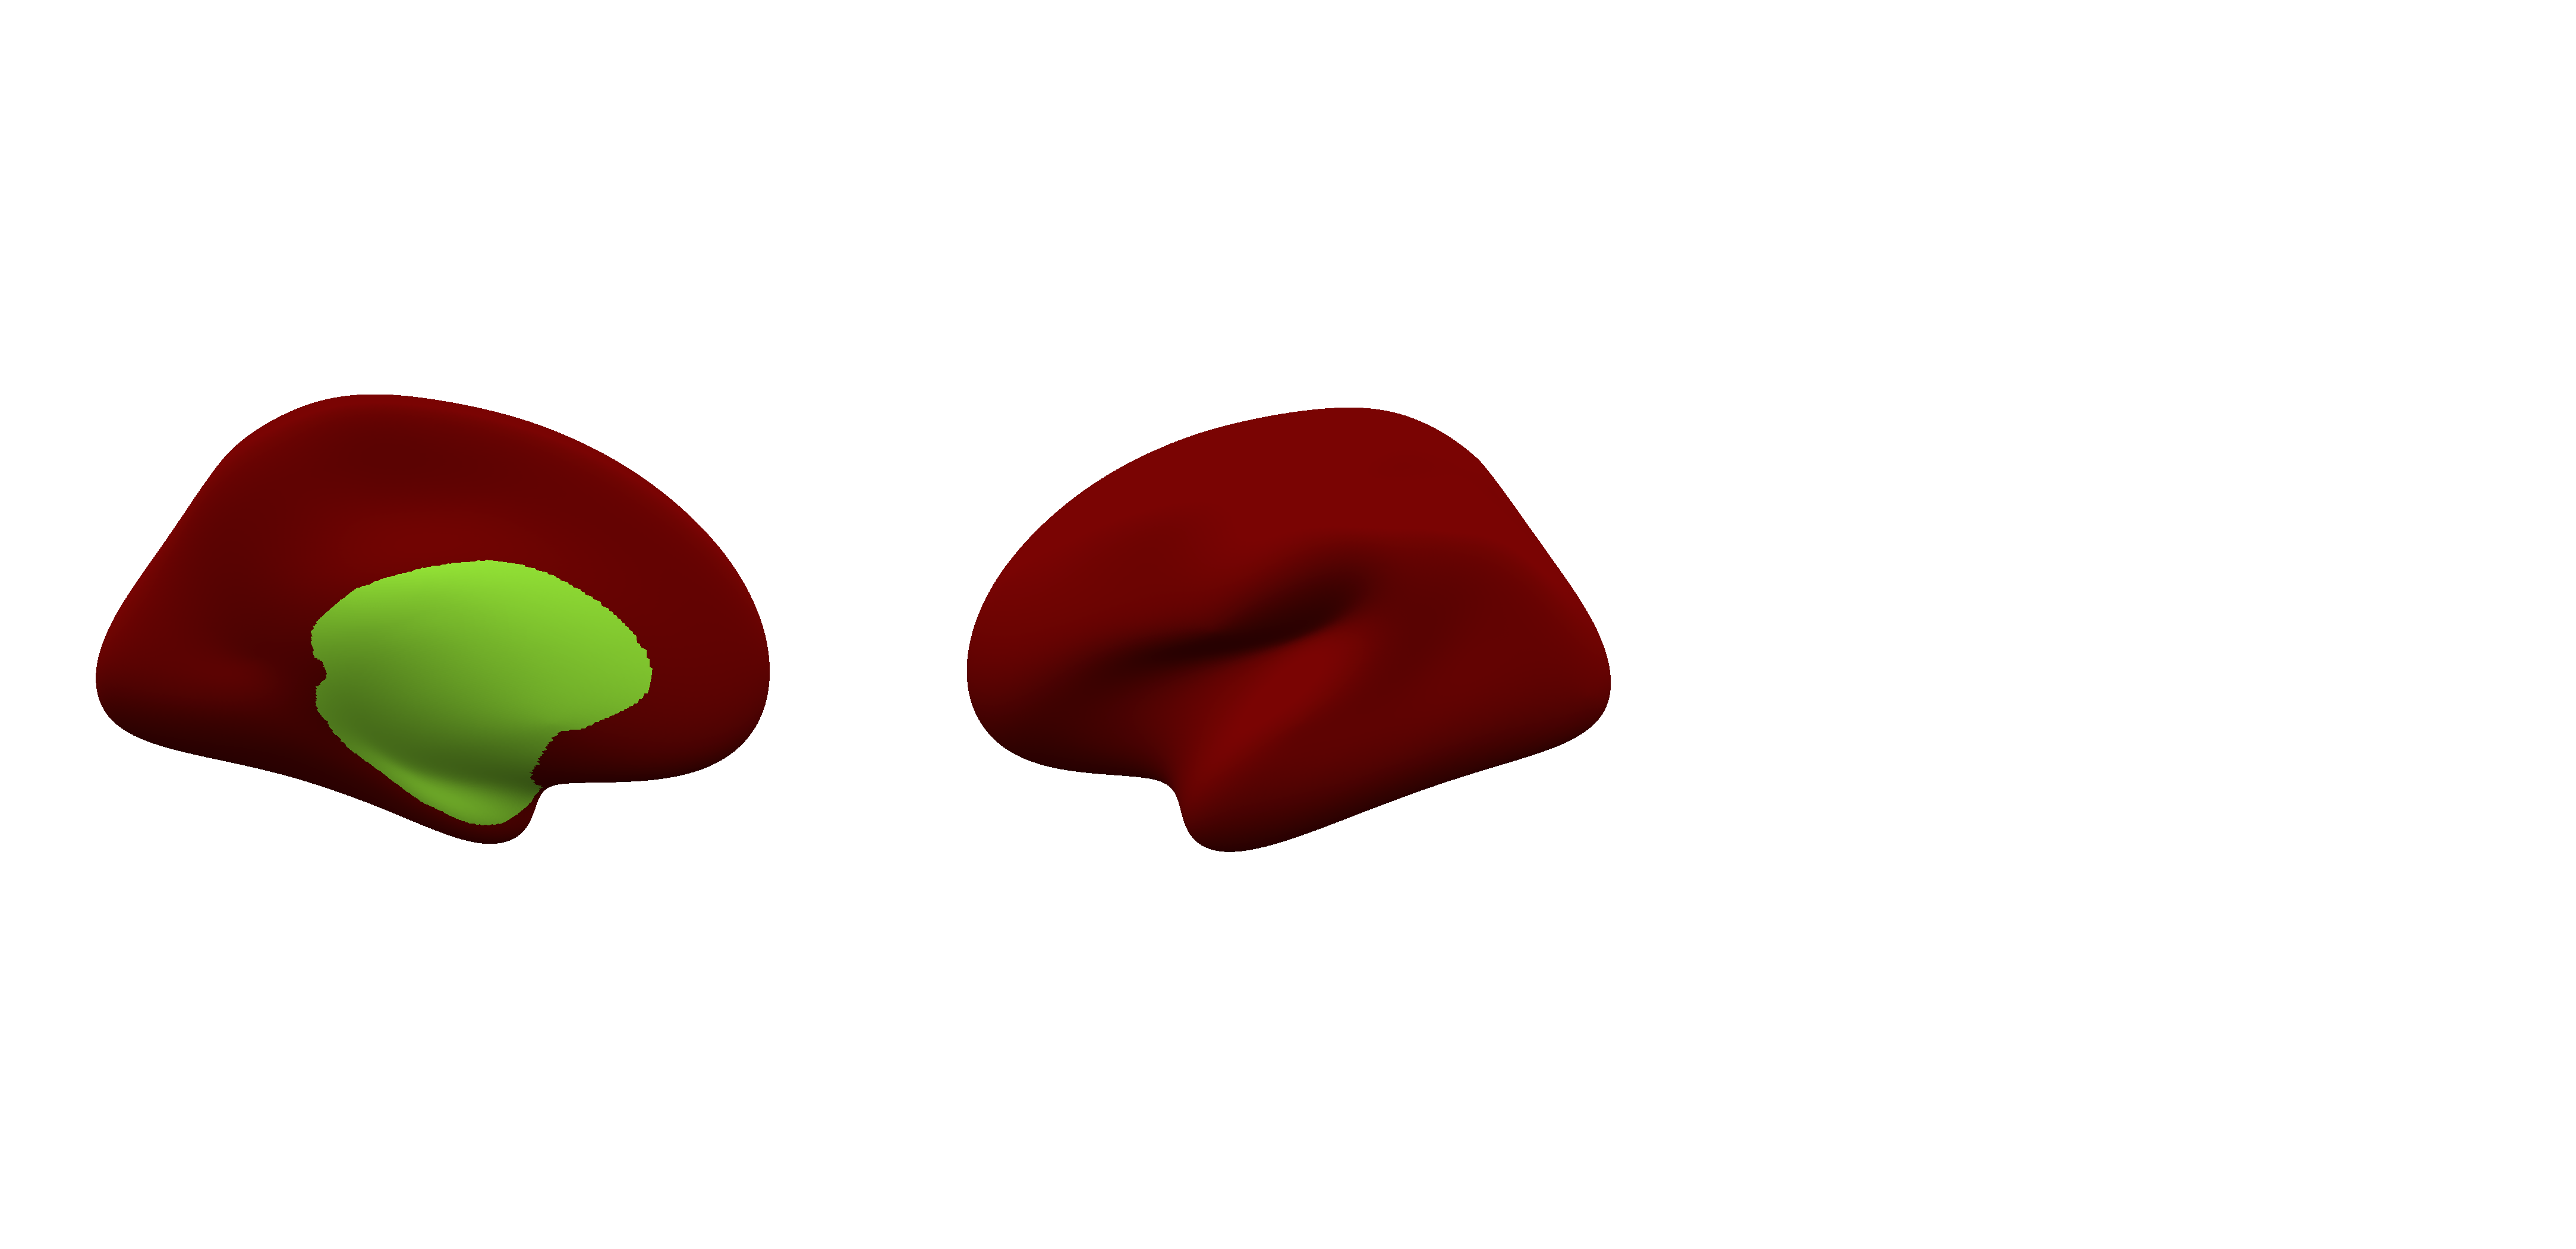

In [10]:
# plot two_threshold results results
data = cohort.split_hemispheres(eva.data_dictionary['MELD_H2_15T_FCD_0001']['cluster_thresholded'])
msp.plot_surf(cohort.surf['coords'],cohort.surf['faces'], data['left'],
    cmap='turbo',base_size = 30, colorbar=False, 
    vmin = -5e-5, vmax = 5e-5,
    )

data = cohort.split_hemispheres(eva.data_dictionary['MELD_H2_15T_FCD_0003']['cluster_thresholded'])
msp.plot_surf(cohort.surf['coords'],cohort.surf['faces'], data['left'],
    cmap='turbo',base_size = 30, colorbar=False, 
    vmin = -5e-5, vmax = 5e-5,
    )

data = cohort.split_hemispheres(eva.data_dictionary['MELD_H2_15T_FCD_0005']['cluster_thresholded'])
msp.plot_surf(cohort.surf['coords'],cohort.surf['faces'], data['left'],
    cmap='turbo',base_size = 30, colorbar=False, 
    vmin = -5e-5, vmax = 5e-5,
    )

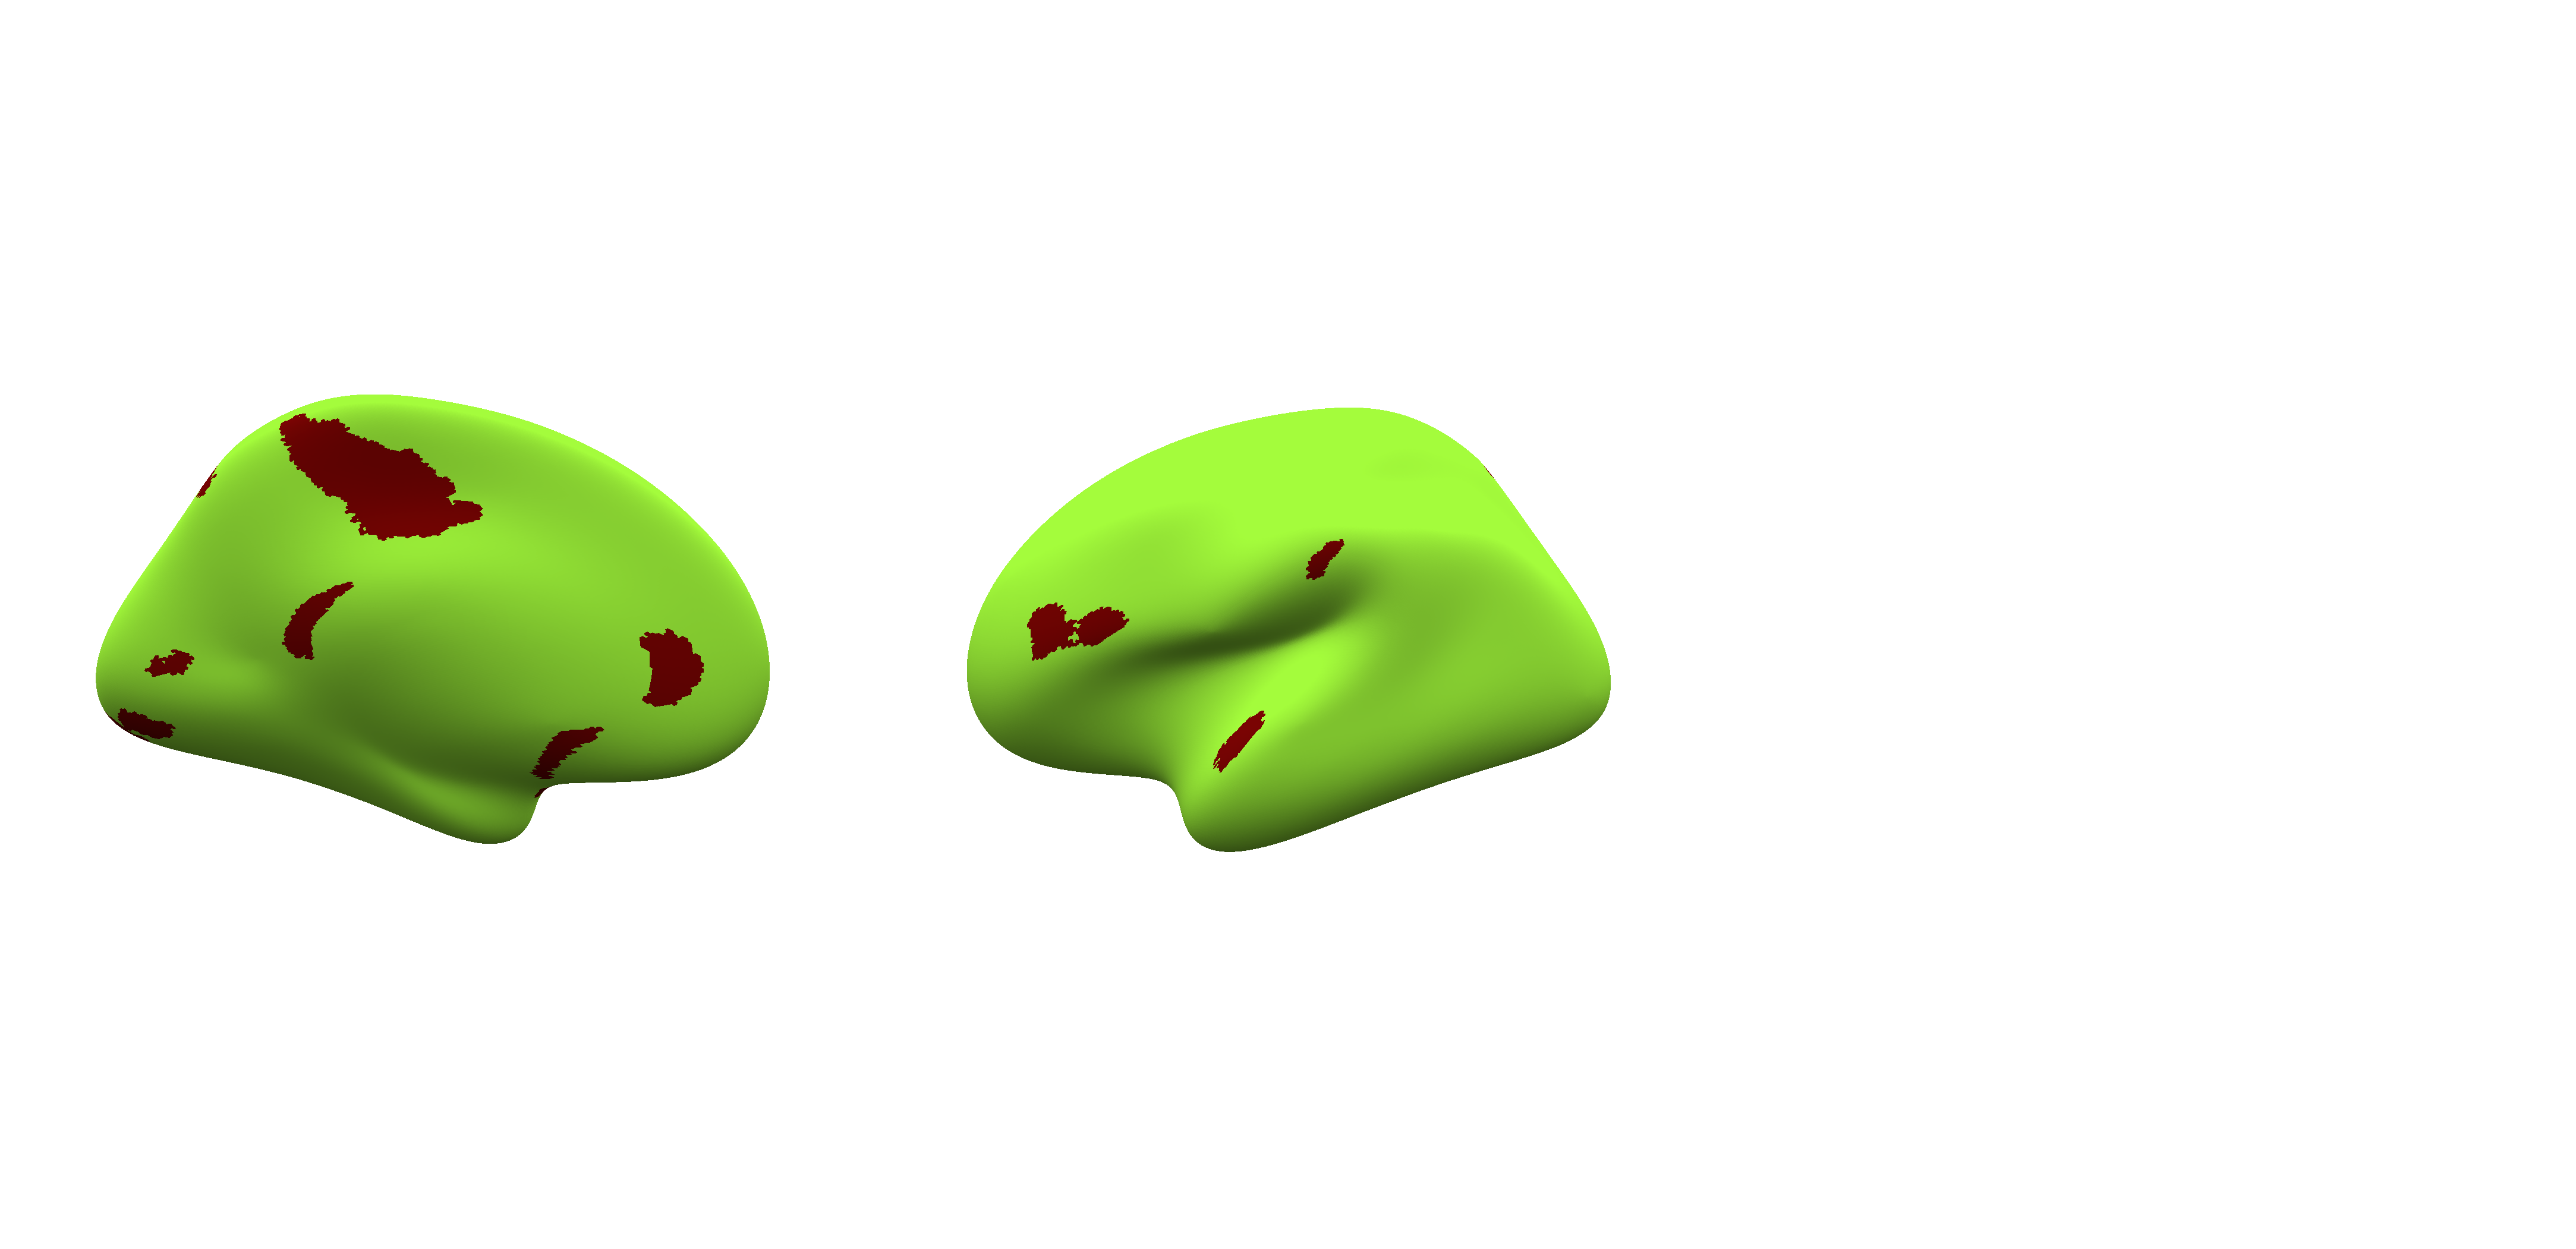

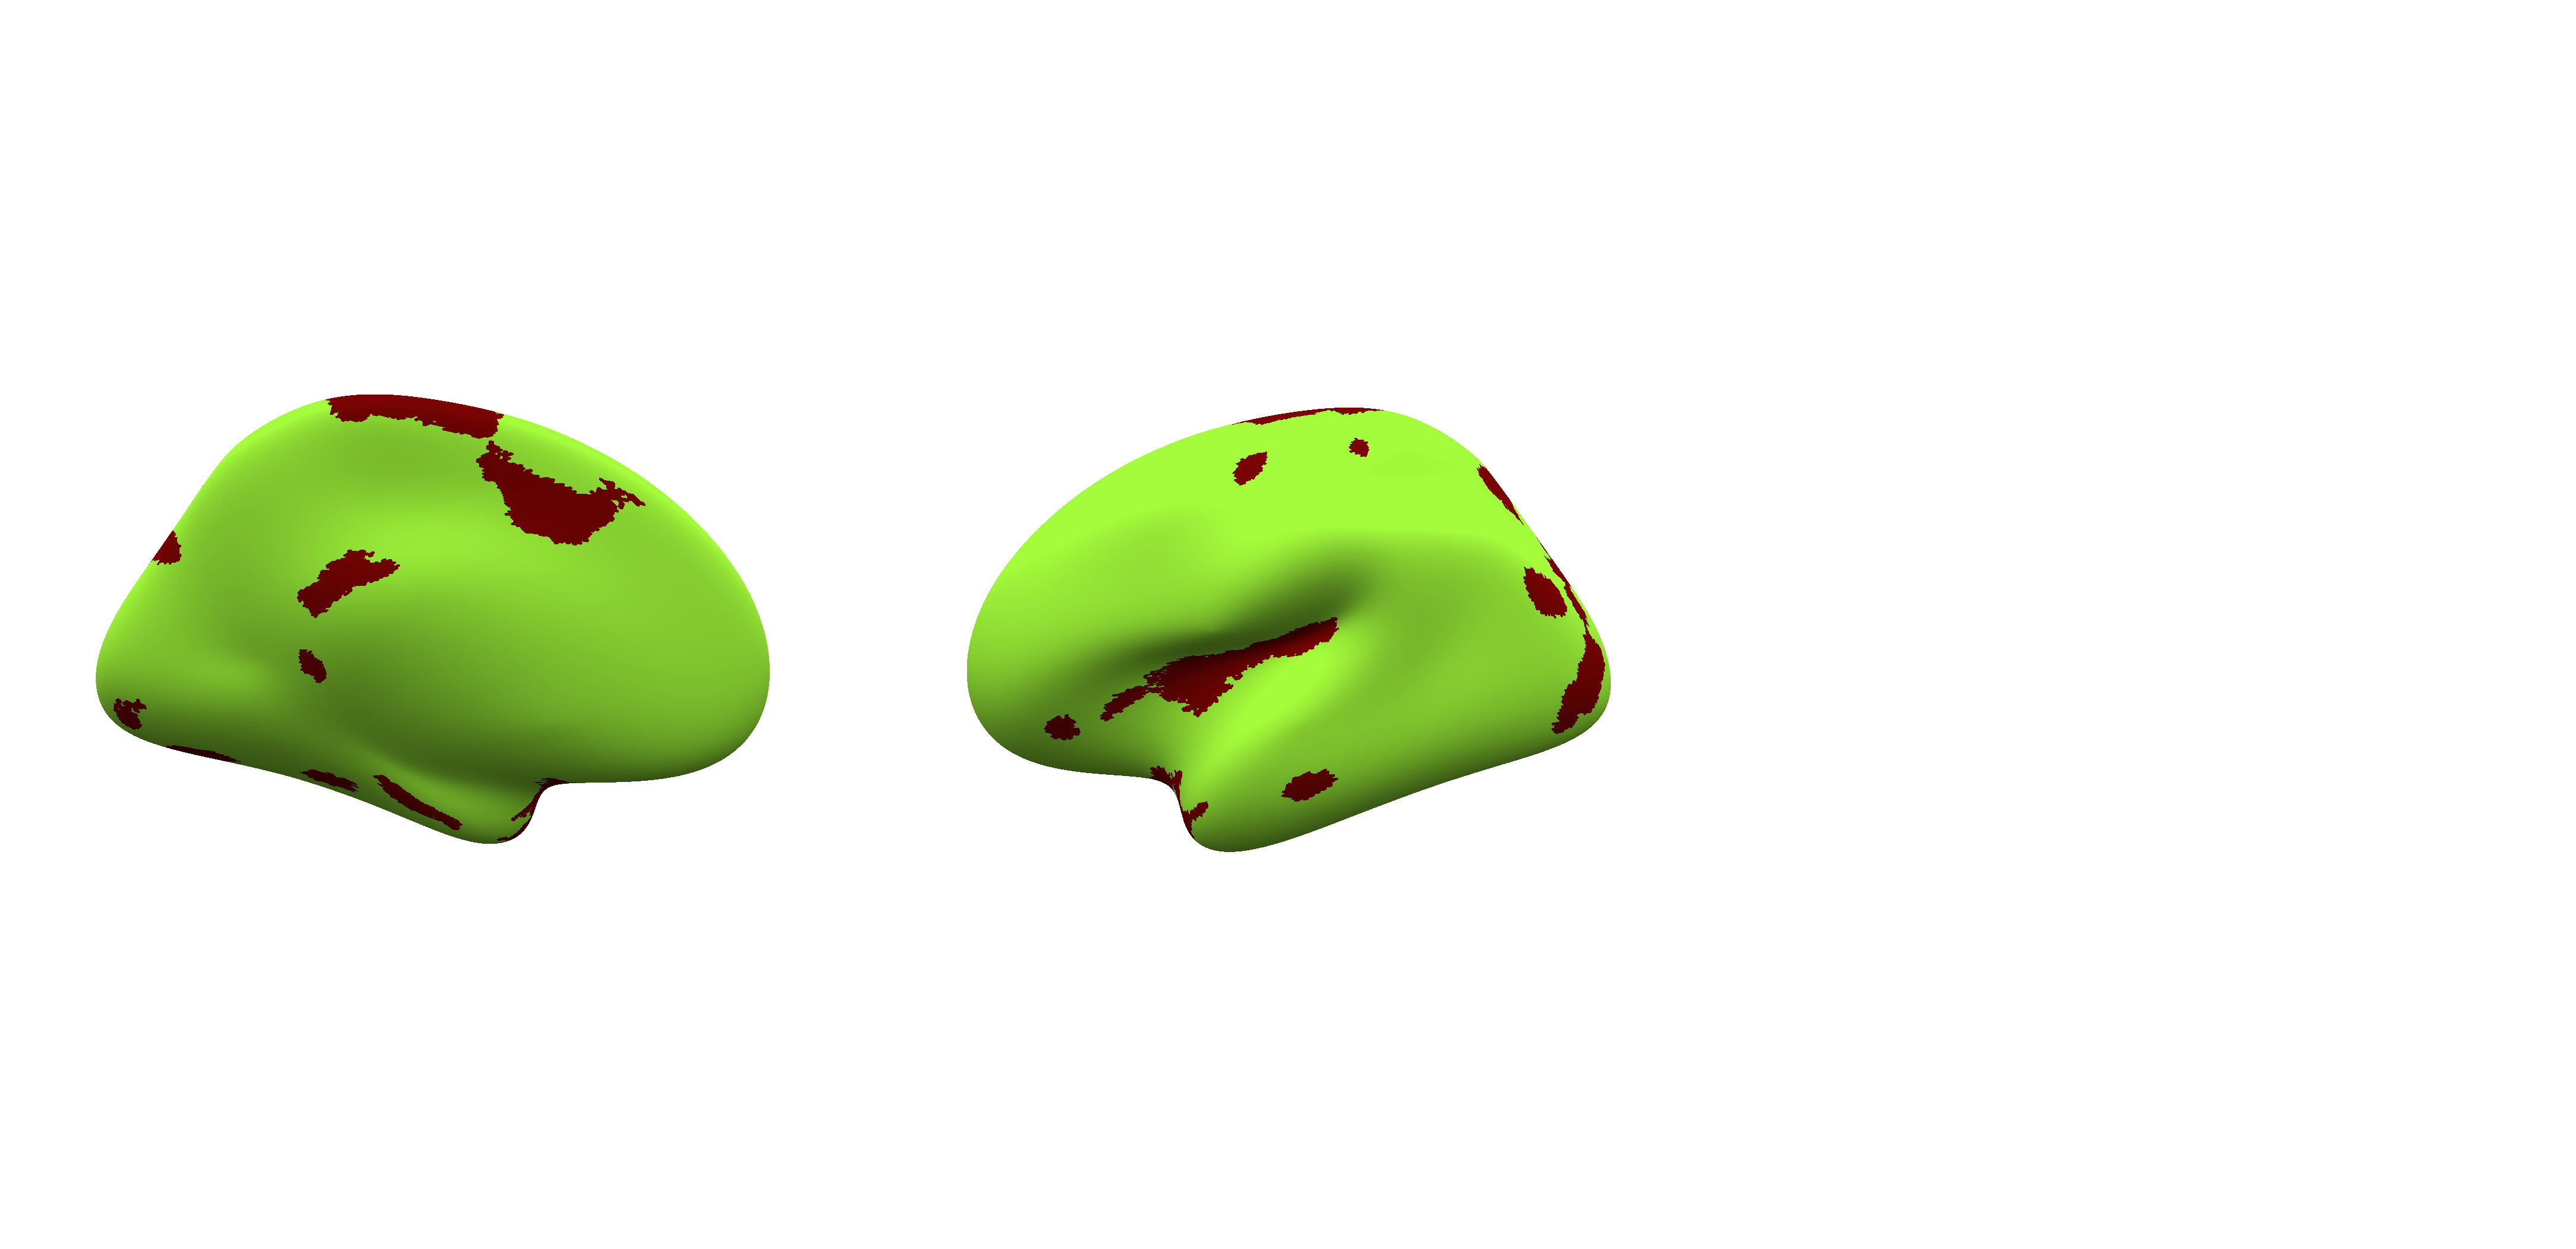

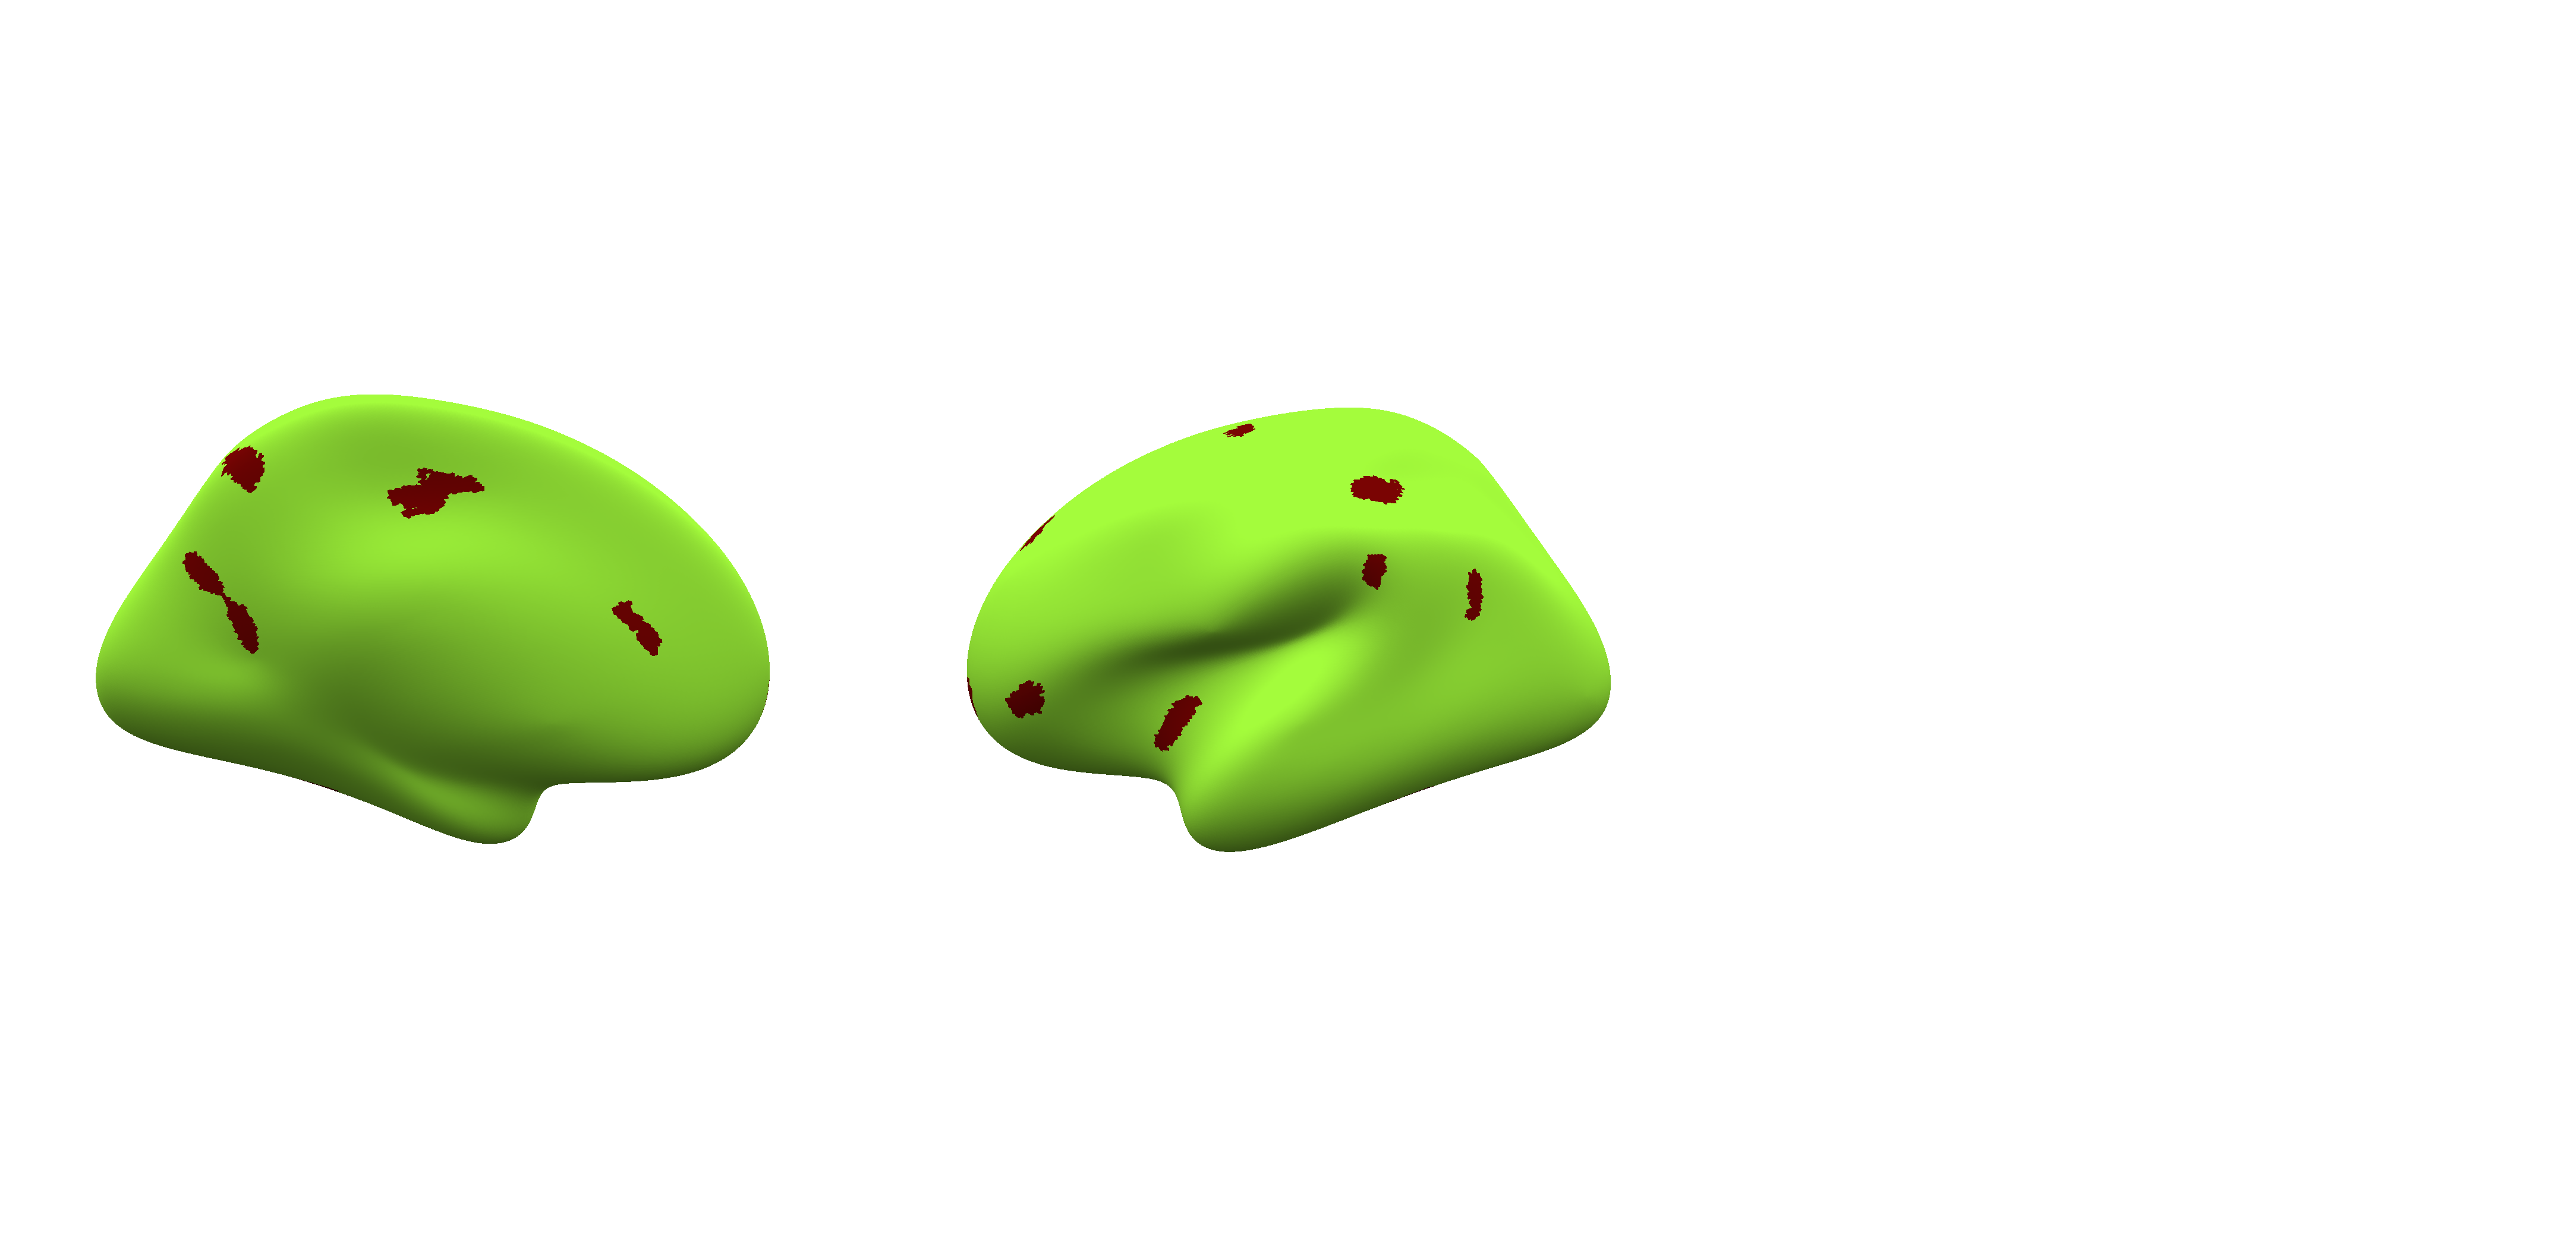

In [27]:
# plot two_threshold results results
data = cohort.split_hemispheres(eva.data_dictionary['MELD_H2_15T_FCD_0001']['cluster_thresholded'])
msp.plot_surf(cohort.surf['coords'],cohort.surf['faces'], data['left'],
    cmap='turbo',base_size = 30, colorbar=False, 
    vmin = -5e-5, vmax = 5e-5,
    )

data = cohort.split_hemispheres(eva.data_dictionary['MELD_H2_15T_FCD_0003']['cluster_thresholded'])
msp.plot_surf(cohort.surf['coords'],cohort.surf['faces'], data['left'],
    cmap='turbo',base_size = 30, colorbar=False, 
    vmin = -5e-5, vmax = 5e-5,
    )

data = cohort.split_hemispheres(eva.data_dictionary['MELD_H2_15T_FCD_0005']['cluster_thresholded'])
msp.plot_surf(cohort.surf['coords'],cohort.surf['faces'], data['left'],
    cmap='turbo',base_size = 30, colorbar=False, 
    vmin = -5e-5, vmax = 5e-5,
    )

## sigmoid

In [10]:
# from evaluate_single_model.sh
cohort = MeldCohort(hdf5_file_root='{site_code}_{group}_featurematrix_combat_6.hdf5',
               dataset='MELD_dataset_V6.csv')
exp = meld_graph.experiment.Experiment.from_folder(model_name)

subjects = exp.data_parameters[f'{split}_ids'][:20]

features= exp.data_parameters['features']
exp.data_parameters['augment_data']={}

dataset = GraphDataset(subjects, cohort, exp.data_parameters, mode='test')

eva = Evaluator(experiment = exp,
                checkpoint_path = model_name,
                save_dir = model_name,
                make_images = False,
                dataset=dataset,
                cohort=cohort,
                subject_ids = subjects,
                mode = 'test',
                saliency=True,
               threshold='sigmoid')

Initialised Experiment 23-10-30_FOPF_dcop/s_0


/home/co-spit1/software/meld_classifier_GDL/meld_experiments_graph/kw350/23-10-30_FOPF_dcop/s_0/fold_all


Loading and preprocessing test data
Z-scoring data for MELD_H2_15T_FCD_0001
Z-scoring data for MELD_H2_15T_FCD_0003
Z-scoring data for MELD_H2_15T_FCD_0005
Z-scoring data for MELD_H2_15T_FCD_0007
Z-scoring data for MELD_H2_15T_FCD_0008
Z-scoring data for MELD_H2_15T_FCD_0009
Z-scoring data for MELD_H2_15T_FCD_0014
Z-scoring data for MELD_H2_15T_FCD_0015
Z-scoring data for MELD_H2_15T_FCD_0016
Z-scoring data for MELD_H2_15T_FCD_0020
Z-scoring data for MELD_H2_15T_FCD_0023
Z-scoring data for MELD_H2_15T_FCD_0028
Z-scoring data for MELD_H2_15T_FCD_0029
Z-scoring data for MELD_H2_15T_FCD_0030
Z-scoring data for MELD_H2_3T_FCD_0003
Z-scoring data for MELD_H2_3T_FCD_0004
Z-scoring data for MELD_H2_3T_FCD_0005
Z-scoring data for MELD_H2_3T_FCD_0006
Z-scoring data for MELD_H2_3T_FCD_0008
Z-scoring data for MELD_H2_3T_FCD_0014
Evaluation test, min area threshold=100, threshold sigmoid(ymin=0.1825576901435852, ymax=0.5, k=1.0, m=0.05)
Creating model
Loading model weights from checkpoint /home/co

In [11]:
eva.load_predict_data(save_prediction=False)
eva.threshold_and_cluster(save_prediction=False)

loading data and predicting model
/home/co-spit1/software/meld_classifier_GDL/meld_graph/evaluation.py:329: RuntimeWarning: invalid value encountered in true_divide
  x = 1 - self.roc_dictionary["specificity"] / self.roc_dictionary["specificity"][-1]


Using sigmoid params: 0.1825576901435852, 0.5, 1.0, 0.05
threshold_subj = 0.5
{'left': array([0.50977522, 0.52059448, 0.57413316, ..., 0.55893064, 0.56833178,
       0.57067537]), 'right': array([0.52054572, 0.51409119, 0.52394855, ..., 0.52456272, 0.52405447,
       0.52379584])} 0.5
Using sigmoid params: 0.1825576901435852, 0.5, 1.0, 0.05
threshold_subj = 0.5
{'left': array([0.51908672, 0.55710423, 0.58773363, ..., 0.59371954, 0.60005027,
       0.60322195]), 'right': array([0.57025063, 0.51844871, 0.52993923, ..., 0.59808671, 0.58396673,
       0.57321   ])} 0.5
Using sigmoid params: 0.1825576901435852, 0.5, 1.0, 0.05
threshold_subj = 0.5
{'left': array([0.51565212, 0.53402966, 0.57151741, ..., 0.52399045, 0.52165347,
       0.52031124]), 'right': array([0.50402164, 0.51491416, 0.52167022, ..., 0.52371019, 0.51856178,
       0.52308822])} 0.5
Using sigmoid params: 0.1825576901435852, 0.5, 1.0, 0.05
threshold_subj = 0.5
{'left': array([0.52641624, 0.52904266, 0.51957667, ..., 0.56838

In [12]:
eva.data_dictionary

{'MELD_H2_15T_FCD_0001': {'input_labels': array([0, 0, 0, ..., 0, 0, 0]),
  'result': array([0.5097752 , 0.5205945 , 0.57413316, ..., 0.5245627 , 0.52405447,
         0.52379584], dtype=float32),
  'distance_map': array([-6.3728454e-05, -1.1875620e-04, -2.1534050e-03, ...,
         -2.3672354e-04, -2.2102233e-04, -4.3705016e-04], dtype=float32),
  'borderzone': array([False, False, False, ..., False, False, False]),
  'input_features': array([[-1.2169651 ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [-0.96694344,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.2776902 ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [-0.19492689,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [-0.19304131,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [-0.14171083,  0.  

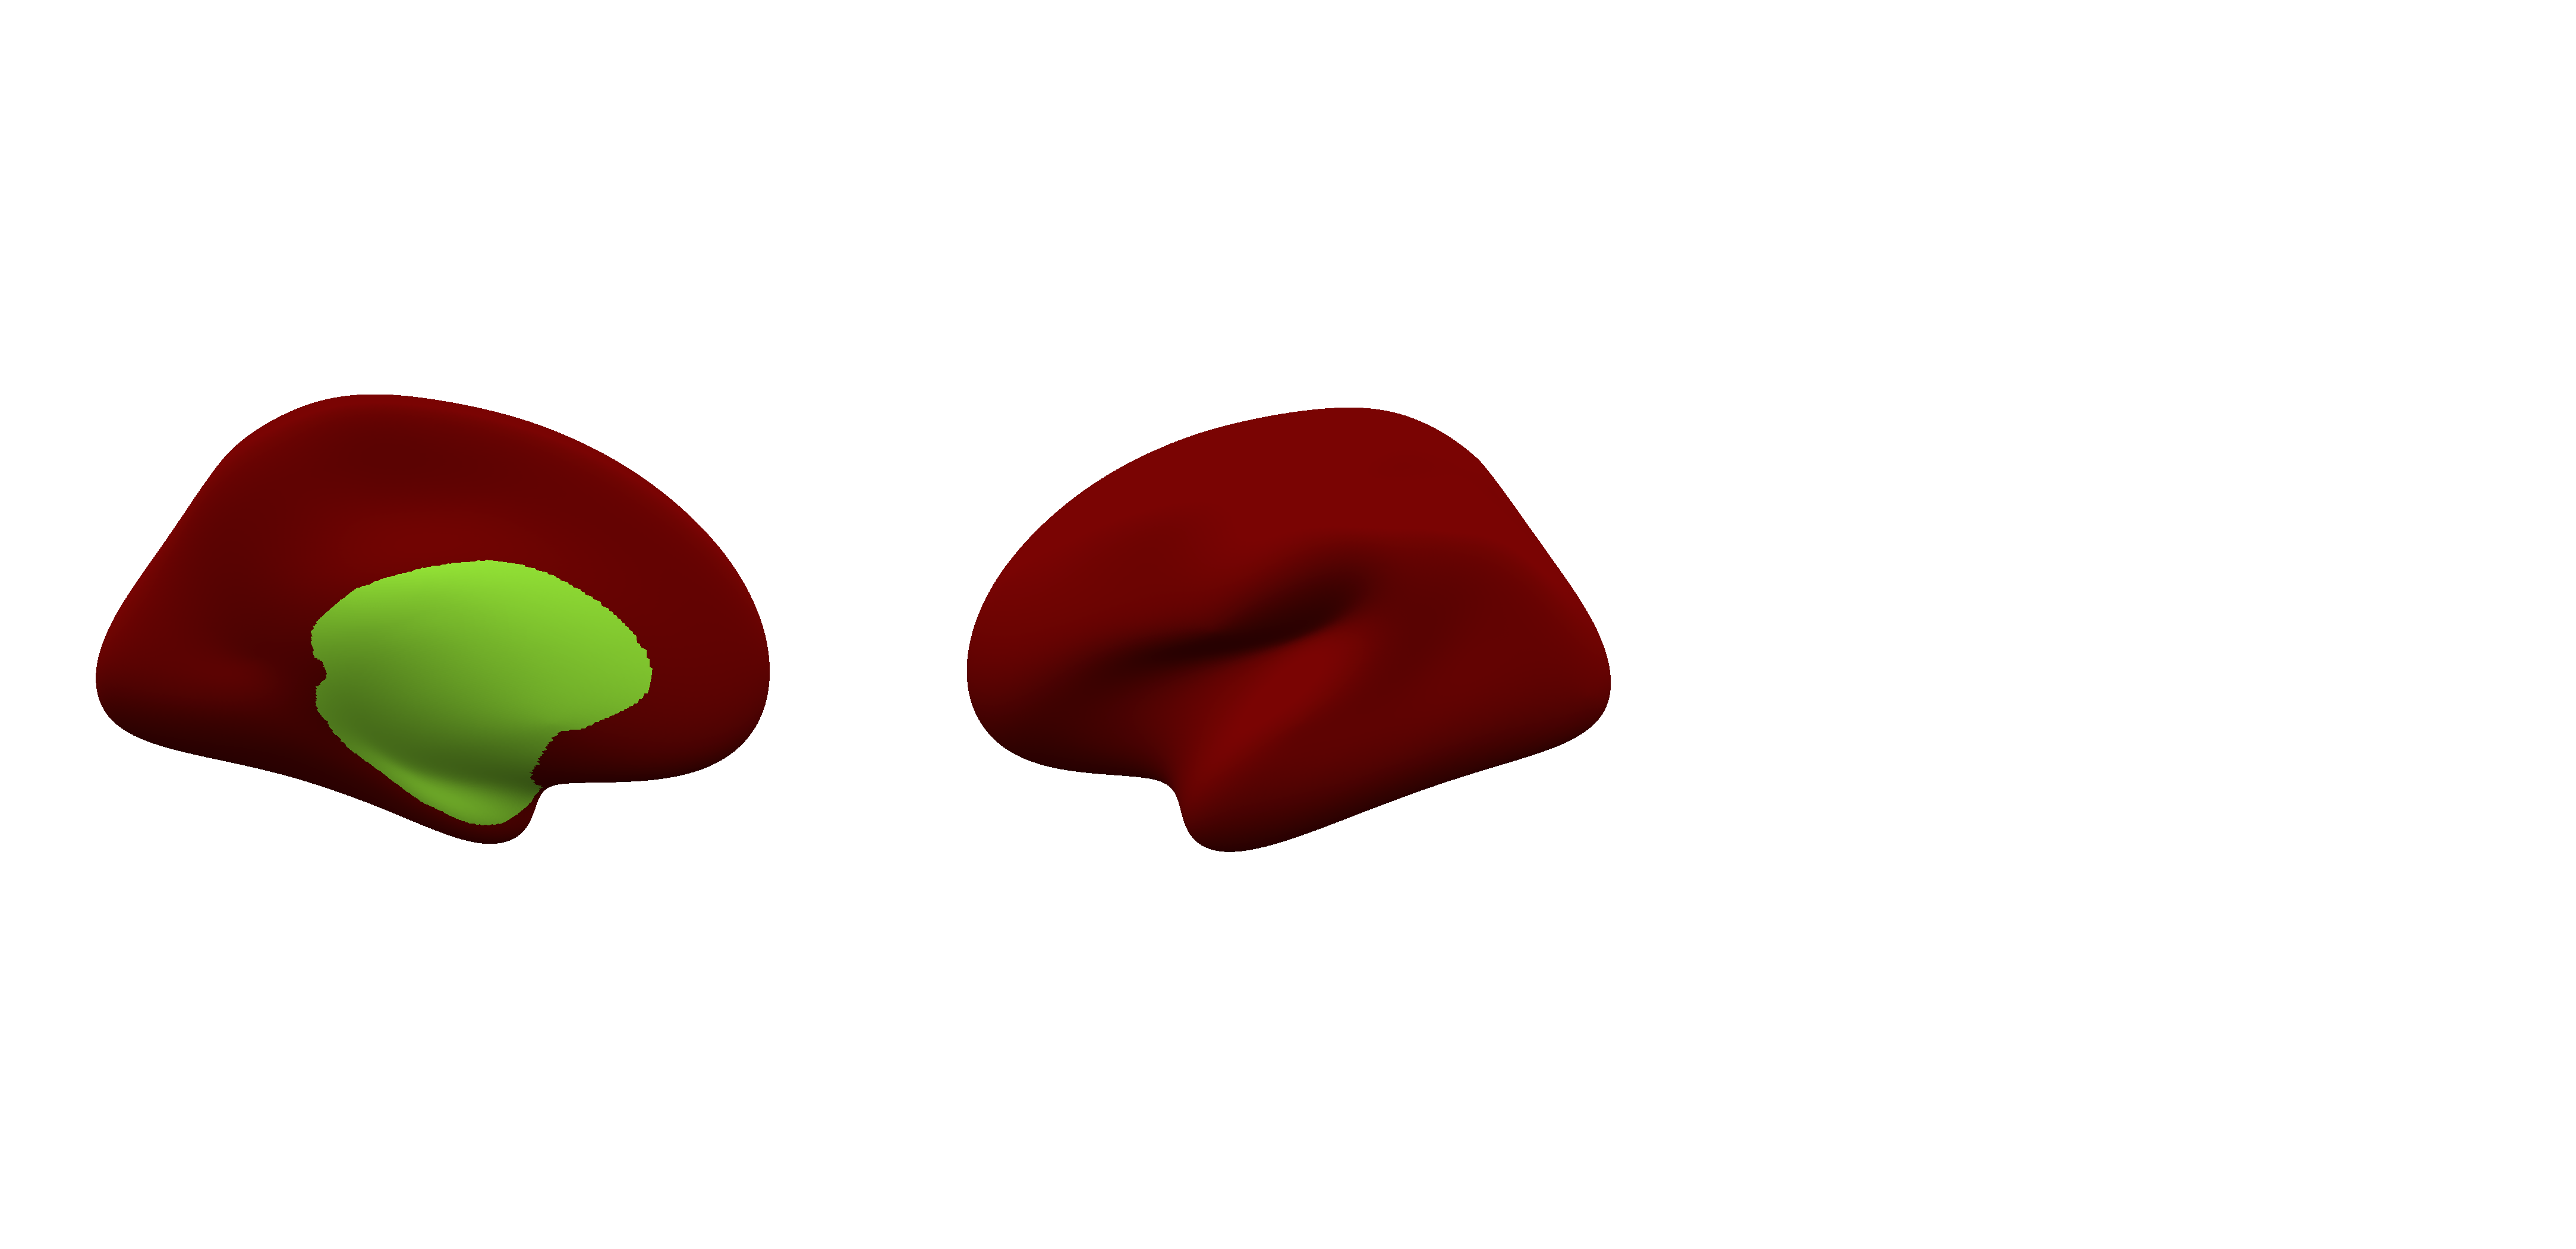

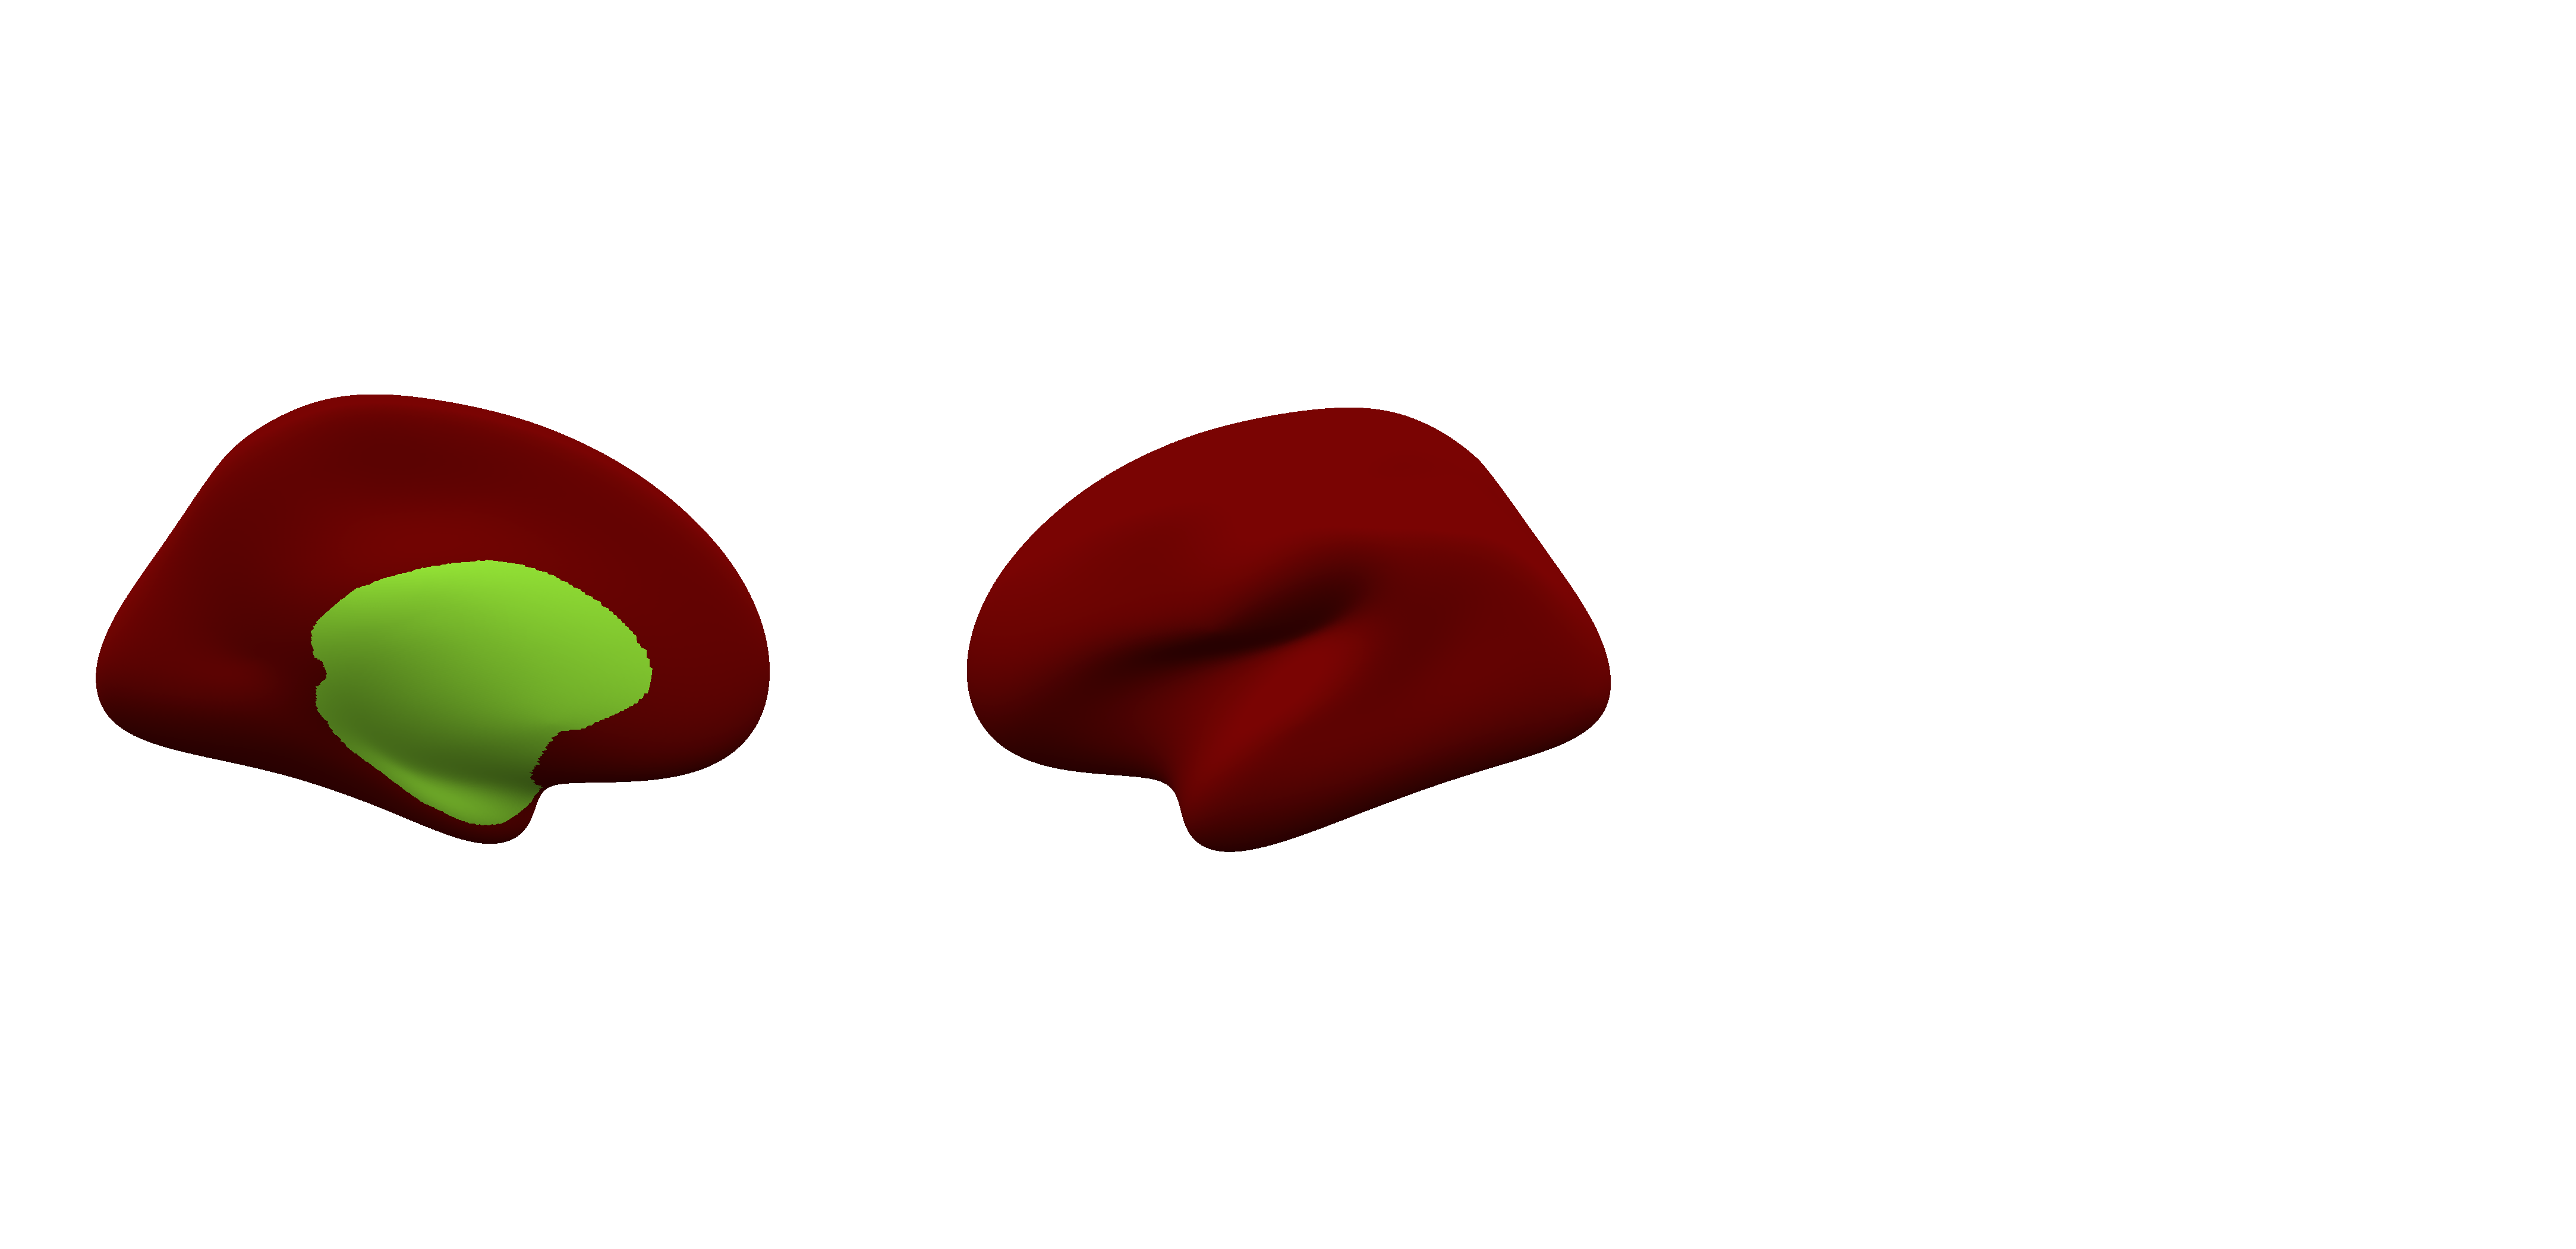

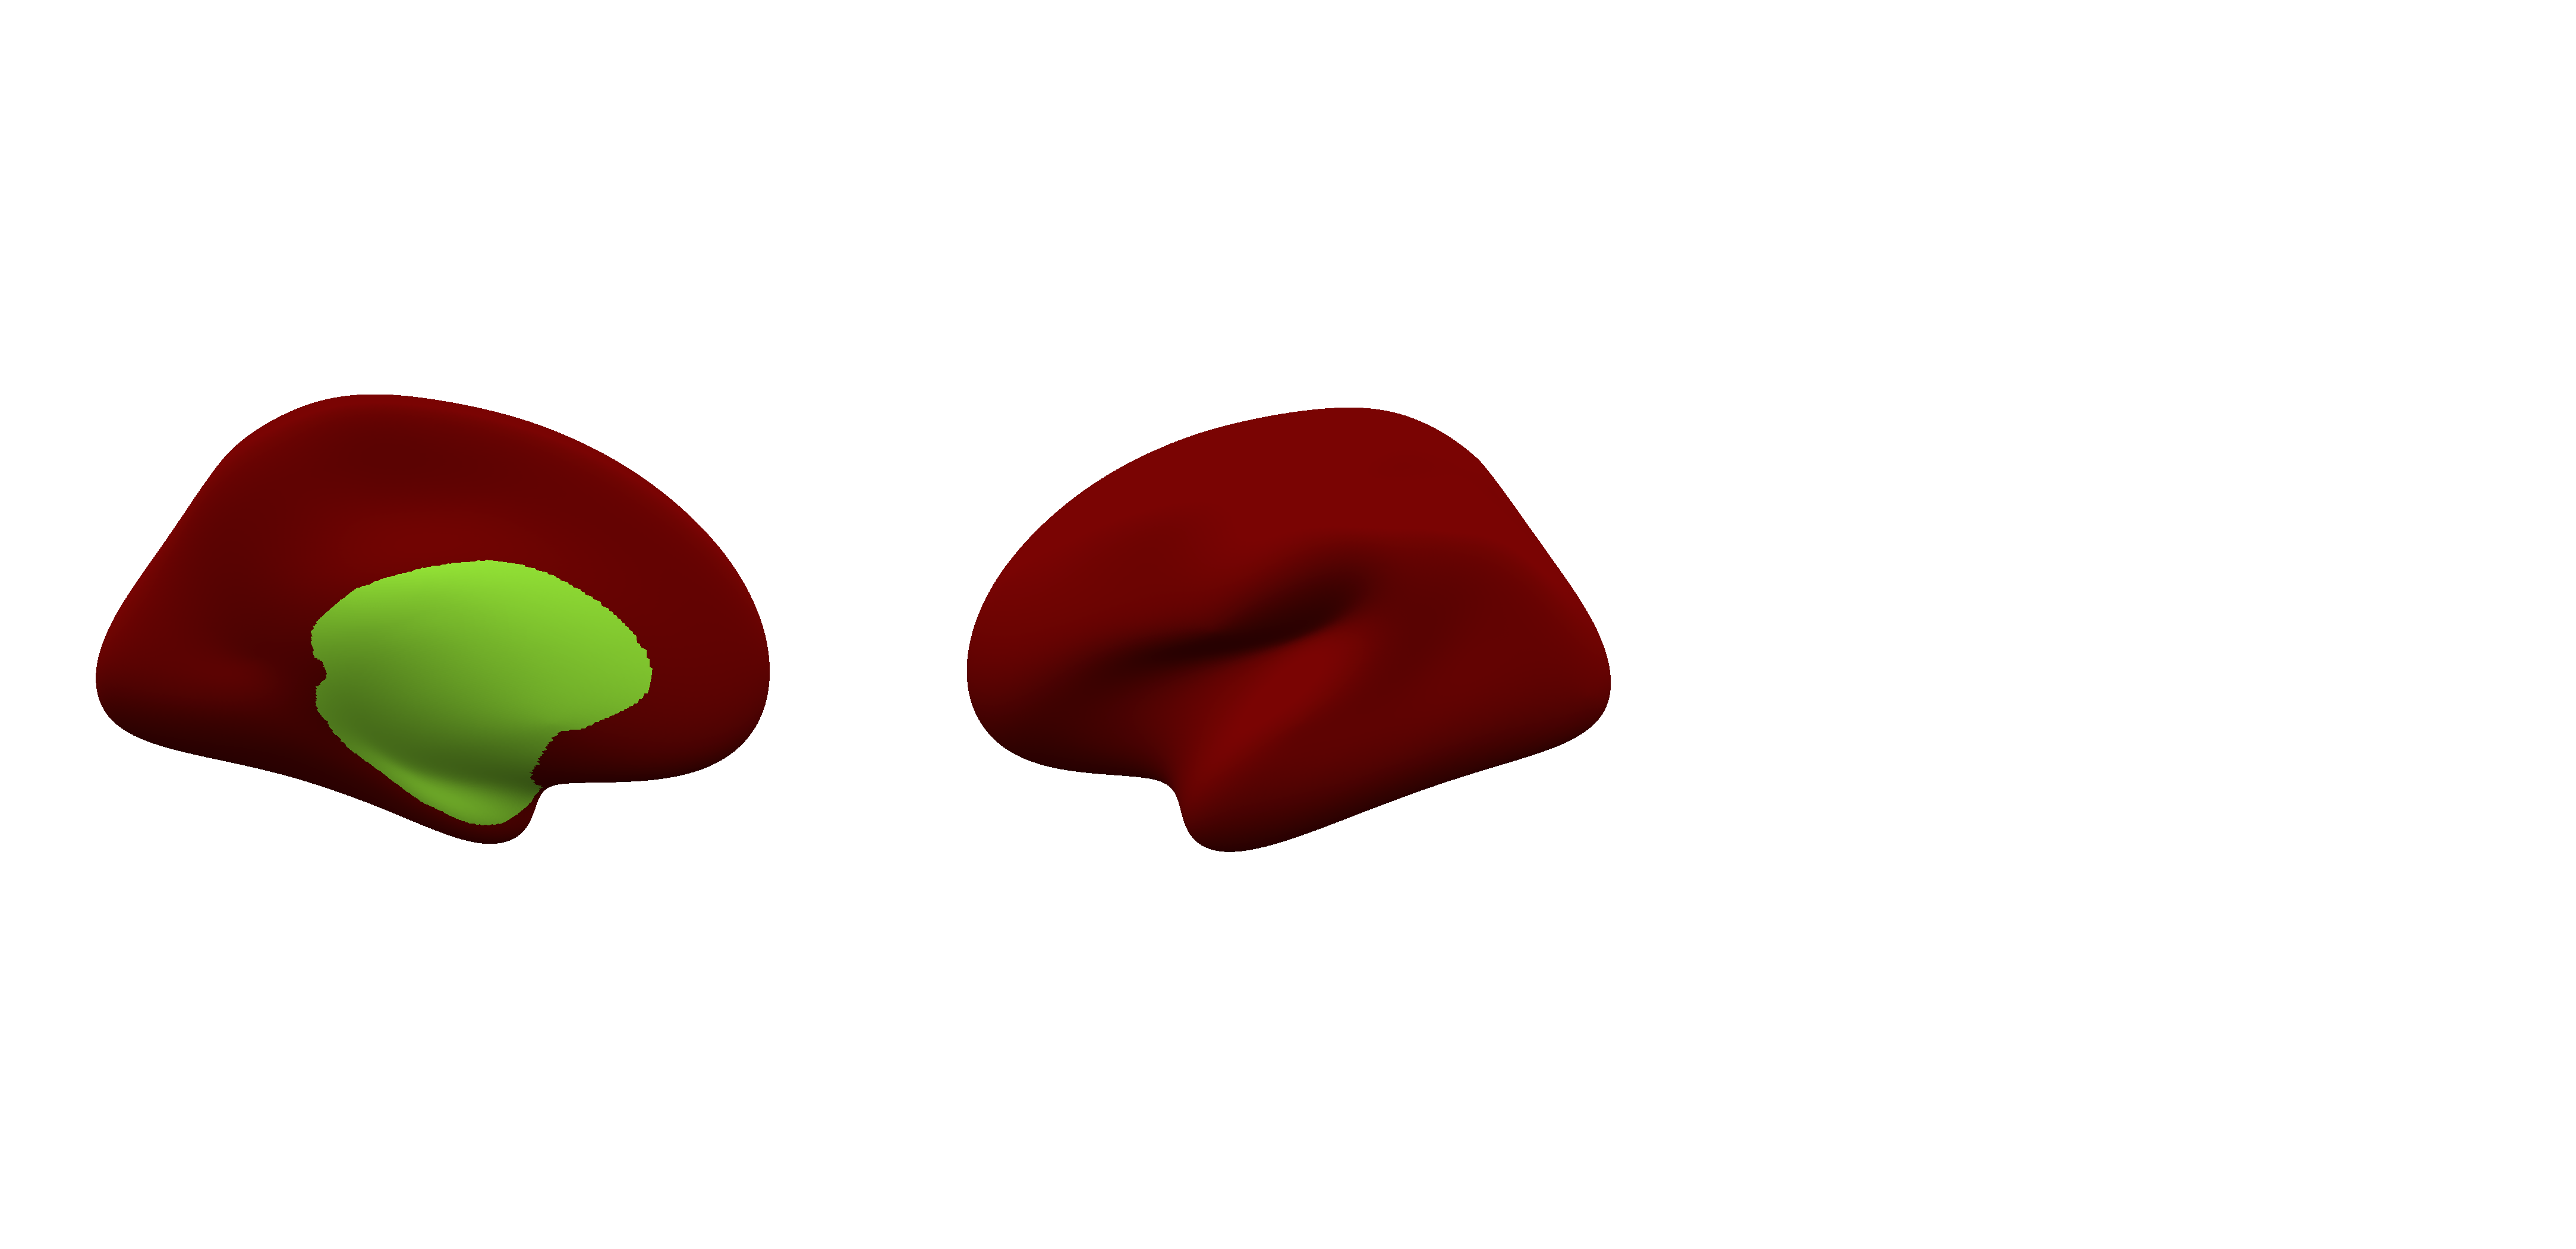

In [13]:
# plot sigmoid results
data = cohort.split_hemispheres(eva.data_dictionary['MELD_H2_15T_FCD_0001']['cluster_thresholded'])
msp.plot_surf(cohort.surf['coords'],cohort.surf['faces'], data['left'],
    cmap='turbo',base_size = 30, colorbar=False, 
    vmin = -5e-5, vmax = 5e-5,
    )

data = cohort.split_hemispheres(eva.data_dictionary['MELD_H2_15T_FCD_0003']['cluster_thresholded'])
msp.plot_surf(cohort.surf['coords'],cohort.surf['faces'], data['left'],
    cmap='turbo',base_size = 30, colorbar=False, 
    vmin = -5e-5, vmax = 5e-5,
    )

data = cohort.split_hemispheres(eva.data_dictionary['MELD_H2_15T_FCD_0005']['cluster_thresholded'])
msp.plot_surf(cohort.surf['coords'],cohort.surf['faces'], data['left'],
    cmap='turbo',base_size = 30, colorbar=False, 
    vmin = -5e-5, vmax = 5e-5,
    )

In [14]:
sigmoid(np.array([0,0.2,0.4,0.6,0.8,1]), ymin=0.02, ymax=0.5)

array([0.5       , 0.47176471, 0.35230769, 0.16769231, 0.04823529,
       0.02      ])